In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
global_deaths = pd.read_csv("Resources/time_series_covid19_deaths_global.csv")
global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,111,112,113,117,120,123,128,134,138,144
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,29,29,29,30,33,33,35,39,40,41


In [3]:
europe_df_a = global_deaths[global_deaths["Country/Region"] == "Russia"]
europe_df_b = global_deaths[global_deaths["Country/Region"] == "Sweden"]
europe_df_c = global_deaths[global_deaths["Country/Region"] == "Germany"]
europe_df_d = global_deaths[global_deaths["Country/Region"] == "France"]
europe_df_e = global_deaths[global_deaths["Country/Region"] == "Italy"]
europe_df_f = global_deaths[global_deaths["Country/Region"] == "United Kingdom"]
europe_df_g = global_deaths[global_deaths["Country/Region"] == "Spain"]
europe_df_h = global_deaths[global_deaths["Country/Region"] == "Ukraine"]
europe_df_i = global_deaths[global_deaths["Country/Region"] == "Poland"]
europe_df_j = global_deaths[global_deaths["Country/Region"] == "Romania"]

In [4]:
europe_deaths = europe_df_a.append(europe_df_b)
europe_deaths = europe_deaths.append(europe_df_c)
europe_deaths = europe_deaths.append(europe_df_d)
europe_deaths = europe_deaths.append(europe_df_e)
europe_deaths = europe_deaths.append(europe_df_f)
europe_deaths = europe_deaths.append(europe_df_g)
europe_deaths = europe_deaths.append(europe_df_h)
europe_deaths = europe_deaths.append(europe_df_i)
europe_deaths = europe_deaths.append(europe_df_j)
europe_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
187,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,...,12228,12323,12408,12561,12726,12873,13026,13172,13249,13334
205,NaN,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,5619,5619,5639,5646,5667,5676,5697,5697,5697,5700
120,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,9091,9092,9094,9099,9102,9110,9120,9124,9124,9125
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,37,37,38,39,39,40,41,41,41,42
108,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
110,Mayotte,France,-12.827500,45.166244,0,0,0,0,0,0,...,37,37,38,38,38,38,38,38,38,38
111,New Caledonia,France,-20.904305,165.618042,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,Reunion,France,-21.115100,55.536400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,4
113,Saint Barthelemy,France,17.900000,-62.833300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
clean_europe_deaths = europe_deaths.loc[europe_deaths["Province/State"].isnull()]
clean_europe_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
187,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,...,12228,12323,12408,12561,12726,12873,13026,13172,13249,13334
205,NaN,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,5619,5619,5639,5646,5667,5676,5697,5697,5697,5700
120,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,9091,9092,9094,9099,9102,9110,9120,9124,9124,9125
116,NaN,France,46.227600,2.213700,0,0,0,0,0,0,...,30046,30046,30069,30056,30063,30072,30081,30081,30081,30096
137,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,35042,35045,35058,35073,35082,35092,35097,35102,35107,35112
223,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,45273,45300,45312,45422,45501,45554,45677,45738,45752,45759
201,NaN,Spain,40.463667,-3.749220,0,0,0,0,0,0,...,28420,28420,28422,28424,28426,28429,28432,28432,28432,28432
215,NaN,Ukraine,48.379400,31.165600,0,0,0,0,0,0,...,1496,1504,1517,1537,1553,1570,1591,1610,1625,1636
183,NaN,Poland,51.919400,19.145100,0,0,0,0,0,0,...,1618,1624,1627,1636,1642,1651,1655,1664,1671,1676
186,NaN,Romania,45.943200,24.966800,0,0,0,0,0,0,...,2009,2026,2038,2074,2101,2126,2150,2165,2187,2206


In [6]:
clean_europe_deaths = clean_europe_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
clean_europe_deaths = clean_europe_deaths.set_index("Country/Region")
clean_europe_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,0,0,0,0,0,0,0,0,0,0,...,12228,12323,12408,12561,12726,12873,13026,13172,13249,13334
Sweden,0,0,0,0,0,0,0,0,0,0,...,5619,5619,5639,5646,5667,5676,5697,5697,5697,5700
Germany,0,0,0,0,0,0,0,0,0,0,...,9091,9092,9094,9099,9102,9110,9120,9124,9124,9125
France,0,0,0,0,0,0,0,0,0,0,...,30046,30046,30069,30056,30063,30072,30081,30081,30081,30096
Italy,0,0,0,0,0,0,0,0,0,0,...,35042,35045,35058,35073,35082,35092,35097,35102,35107,35112
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,45273,45300,45312,45422,45501,45554,45677,45738,45752,45759
Spain,0,0,0,0,0,0,0,0,0,0,...,28420,28420,28422,28424,28426,28429,28432,28432,28432,28432
Ukraine,0,0,0,0,0,0,0,0,0,0,...,1496,1504,1517,1537,1553,1570,1591,1610,1625,1636
Poland,0,0,0,0,0,0,0,0,0,0,...,1618,1624,1627,1636,1642,1651,1655,1664,1671,1676


In [7]:
clean_europe_tp = clean_europe_deaths.T
clean_europe_tp.head(30)

Country/Region,Russia,Sweden,Germany,France,Italy,United Kingdom,Spain,Ukraine,Poland,Romania
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,0,0


In [8]:
weekly_deaths = clean_europe_tp.iloc[[2,9,16,23,30,37,44,51,58,65,72,79,86,93,100,107,114,121,128,135,142,149,156,163,170,177,184], :] 
weekly_deaths

Country/Region,Russia,Sweden,Germany,France,Italy,United Kingdom,Spain,Ukraine,Poland,Romania
1/24/20,0,0,0,0,0,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,0,0
2/7/20,0,0,0,0,0,0,0,0,0,0
2/14/20,0,0,0,0,0,0,0,0,0,0
2/21/20,0,0,0,1,1,0,0,0,0,0
2/28/20,0,0,0,2,21,0,0,0,0,0
3/6/20,0,0,0,9,197,1,5,0,0,0
3/13/20,0,1,7,79,1266,10,133,1,2,0
3/20/20,1,16,67,450,4032,194,1043,3,5,0
3/27/20,4,105,342,1995,9134,1162,5138,5,16,26


Text(0, 0.5, 'Percentage')

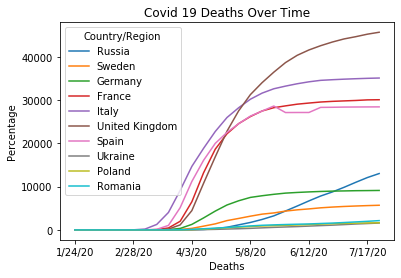

In [14]:
weekly_deaths.plot();
plt.title("Covid 19 Deaths Over Time")
plt.xlabel("Deaths")
plt.ylabel("Percentage")

In [10]:
percent_deaths = weekly_deaths.pct_change()
percent_deaths

Country/Region,Russia,Sweden,Germany,France,Italy,United Kingdom,Spain,Ukraine,Poland,Romania
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/31/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/14/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/21/20,NaN,NaN,NaN,inf,inf,NaN,NaN,NaN,NaN,NaN
2/28/20,NaN,NaN,NaN,1.000000,20.000000,NaN,NaN,NaN,NaN,NaN
3/6/20,NaN,NaN,NaN,3.500000,8.380952,inf,inf,NaN,NaN,NaN
3/13/20,NaN,inf,inf,7.777778,5.426396,9.000000,25.600000,inf,inf,NaN
3/20/20,inf,15.000000,8.571429,4.696203,2.184834,18.400000,6.842105,2.000000,1.500000,NaN
3/27/20,3.000000,5.562500,4.104478,3.433333,1.265377,4.989691,3.926174,0.666667,2.200000,inf


In [11]:
percent_deaths = percent_deaths.dropna(how='any')
percent_deaths

Country/Region,Russia,Sweden,Germany,France,Italy,United Kingdom,Spain,Ukraine,Poland,Romania
3/27/20,3.000000,5.562500,4.104478,3.433333,1.265377,4.989691,3.926174,0.666667,2.200000,inf
4/3/20,7.500000,2.409524,2.728070,2.261654,0.607291,2.839931,1.179447,4.400000,3.437500,4.115385
4/10/20,1.764706,1.430168,1.170196,1.028124,0.283904,1.413268,0.436060,1.555556,1.549296,1.030075
4/17/20,1.904255,0.609195,0.572823,0.414033,0.206695,0.568722,0.243828,0.811594,0.834254,0.522222
4/24/20,1.252747,0.537143,0.323529,0.190397,0.141745,0.350166,0.126087,0.608000,0.487952,0.379562
5/1/20,0.900813,0.232807,0.169444,0.105744,0.087296,0.206998,0.089638,0.353234,0.317814,0.312169
5/8/20,0.473909,0.196758,0.114905,0.066319,0.069592,0.135753,0.071548,0.327206,0.192012,0.240591
5/15/20,0.403366,0.148346,0.051531,0.049366,0.046654,0.088374,0.044108,0.318560,0.168814,0.159263
5/22/20,0.343672,0.076522,0.041915,0.027506,0.031825,0.071206,0.042573,0.235294,0.082690,0.089720
5/29/20,0.346260,0.108280,0.033544,0.014943,0.018794,0.060739,-0.052641,0.154762,0.070265,0.070326


Text(0, 0.5, 'Percentage')

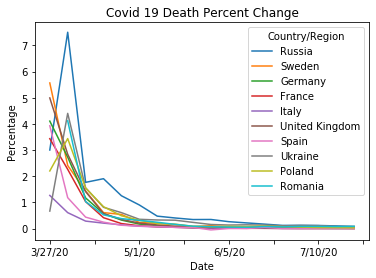

In [13]:
percent_deaths.plot();
# Add labels to the x and y axes
plt.title("Covid 19 Death Percent Change")
plt.xlabel("Date")
plt.ylabel("Percentage")